In [30]:
# Initialize Otter
import otter
grader = otter.Notebook("cs1090a_hw2.ipynb")

# CS1090A Introduction to Data Science
## Homework 2: kNN, Linear/Polynomial Regression, Regularization, and Model Selection

**Harvard University**<br/>
**Fall 2025**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Gumb

<hr style="height:2.4pt">

In [31]:
# RUN THIS CELL 
from IPython.core.display import HTML

# Define custom CSS for the notebook
styles = """
<style>
    h2, h3, h4 {
        color: black;
        border: 1px solid #e0e0e0;
        border-radius: 5px;
        padding: 10px 15px;
        margin-top: 20px;
        margin-bottom: 10px;
        font-weight: bold;
    }
    h2 { background-color: #C8A2C8; } /* Lilac */
    h3 { background-color: #D8BFD8; } /* Thistle */
    h4 { background-color: #E6E6FA; } /* Lavender */
</style>
"""
HTML(styles)

### Import Libraries

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import time

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

from warnings import simplefilter
simplefilter('ignore', category=FutureWarning)

In [33]:
# For calculating total notebook runtime
notebook_start = time.time()

## About this homework

This assignment is the first in which we'll go through the full process of loading a dataset, performing exploratory data analysis (EDA), splitting the data into training, validation, and test sets, and finally fitting and evaluating models. You can use the table of contents panel in your Jupyter environment (e.g., JupyterLab or Colab) to navigate between sections.

The homework is divided into three parts, each using a different dataset:

-   **Part 1: Predicting Car Prices**
    Explore two fundamental modeling techniques: k-Nearest Neighbors (kNN) regression, a non-parametric method, and simple linear regression, a parametric method. Use a validation set to tune the hyperparameter `k` for the kNN model.

-   **Part 2: Analyzing Simulated Income Data**
    Practice exploratory data analysis (EDA) and data critique. Create insightful visualizations to explore relationships in a simulated US census dataset and calculate the Gini coefficient to measure income inequality.

-   **Part 3: Modeling Bacteria Growth**
    Dive deeper into model selection and the bias-variance tradeoff. Using polynomial regression, explore how model complexity (the degree of the polynomial) impacts performance. Compare two common techniques for hyperparameter tuning and model selection—using a single validation set versus k-fold cross-validation—to find a model that generalizes well and avoids overfitting.

<div style="background-color: #E6E6FA; color: black; border: 1px solid #e0e0e0; border-radius: 5px; padding: 10px 15px;">

### Instructions

**Submission Checklist**
- **Run All Cells:** Before submitting, always do **"Restart Kernel and Run All Cells"** to ensure your notebook runs top-to-bottom without errors and all output is visible.
- **Submission:** Follow the submission instructions described in the Canvas assignment.

**General Guidelines**
- **Limit Output:** Avoid excessively long cell outputs.
- **Clarity:** Plots must be legible and well-labeled. Written interpretations should explain what the results *mean*, not just describe them.
- **Code Quality:** Write clean and efficient code. Avoid copy-pasting; use loops or functions instead.
- **Libraries:** Use only the provided libraries unless you get staff approval.
- **Autograding:** The provided tests are not exhaustive. Passing all tests does not guarantee full credit.
- **Cell Management:** Feel free to add new cells as needed.

</div>

<a id="part1"></a>
    
# PART 1 [35 pts]: Predicting the selling price of cars on CarDekho.com

<a id="part1intro"></a>

## Overview

According to its website, **CarDekho.com** is India's leading car search venture. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons, as well as videos and pictures of all car brands and models available in India. Each car has a **current selling price**, which is the price for buying a used car on this site, and an **MRP**, which is the retail price of the car. These two prices differ depending on factors such as brand, make year, mileage, condition, etc.  

### Dataset 

The dataset contains 601 used cars and is available as `data/car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a used car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of the car when it was new (in lakhs). 
- **Kms_Driven** - number of kilometers

**NOTE:** 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

### Objective

Using kNN and linear regression we will predict the `Current_Selling_Price` from the other features available in this dataset.

<a id="part1questions"></a>

## Question 1: Exploratory data analysis (EDA) [5 pts]

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**

<!-- BEGIN QUESTION -->

### Q1.1

Identify all variables in the dataset. For each variable, state whether you consider it to be quantitative or categorical and briefly justify your choices.

All variables in the dataset are considered quantitative.

Year: Quantitative, as it is a numerical value where the interval has a consistent meaning.\
Current_Selling_Price: Quantitative, as it is a continuous numerical measurement of the car's price.\
MRP: Quantitative, as it is a continuous numerical measurement of the car's retail price.\
Kms_Driven: Quantitative, as it is a continuous numerical measurement of distance.

In [34]:
cars_df = pd.read_csv("data/car_dekho_full.csv")

display(cars_df.head())

cars_df.info()

,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   601 non-null    int64  
 1   Current_Selling_Price  601 non-null    float64
 2   MRP                    601 non-null    float64
 3   Kms_Driven             601 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 18.9 KB


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q1.2

The goal in this section is to identify the best feature to use to predict our response, `Current_Selling_Price`. 

- Plot a scatter plot of each feature and our reponse and examine any relationships.
- Which is the predictor that seems to best predict `Current_Selling_Price`? Provide an interpretation of the plots that justifies your choice.

_Type your answer here, replacing this text._

In [35]:
quant_vars = ['Year','Current_Selling_Price','MRP','Kms_Driven']
cars_df[quant_vars].describe()

,Year,Current_Selling_Price,MRP,Kms_Driven
count,601.000,601.000,601.000,601.000
mean,2013.887,4.393,6.912,33718.745
std,2.721,4.518,6.480,26846.657
min,2003.000,0.120,0.320,500.000
25%,2012.000,1.050,1.470,15000.000
50%,2015.000,3.600,6.050,30000.000
75%,2016.000,5.800,9.400,46500.000
max,2018.000,33.000,36.230,213000.000


<!-- END QUESTION -->

<a id="part2questions"></a>

## Question 2: k-Nearest Neighbors [14 pts]

We will begin our modeling with k-Nearest Neighbors (kNN) regression, using `sklearn` for both preprocessing and model fitting.

### Q2.1

Split the dataset into a train, validation, and test set with 60% training data, 20% validation data, and 20% testing data, using argument `random_state = 109`.

The resulting splits should be stored in the variables:

- `X_train_and_val`, `X_test`, `y_train_and_val`, `y_test` (from the first split)  
- `X_train`, `X_val`, `y_train`, `y_val` (from the second split)

In [36]:
X = cars_df.drop('Current_Selling_Price', axis=1)
y = cars_df['Current_Selling_Price']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [37]:
grader.check("q2.1")

q2.1 results: All test cases passed!

### Q2.2

Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization.

<!-- BEGIN QUESTION -->

#### Q2.2.1

For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor `MRP`. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each of your 8 plots should clearly show (a) the training data and the validation data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task.

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q2.2.2

Plot the training and validation $MSE$ values as a function of $k$ (1 plot in total).

In [39]:
cat_cols = cars_df.select_dtypes(include=['object','category']).columns.tolist()
X_encoded = pd.get_dummies(cars_df, columns=cat_cols, drop_first=True)

<!-- END QUESTION -->

#### Q2.2.3

Find the best model based on the validation $MSE$ values. Store the best $k$-value in `best_k` and the best validation $MSE$ in `best_mse`.

In [40]:
mse_scores = {}
for k in range(1, 21):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    mse_scores[k] = mean_squared_error(y_val, y_pred)

best_k = min(mse_scores, key=mse_scores.get)
best_mse = mse_scores[best_k]

In [41]:
print(
    f"The best k value is {best_k}. This corresponds to the "
    f"lowest validation MSE of {best_mse:.3f}."
)

The best k value is 1. This corresponds to the lowest validation MSE of 0.584.


In [42]:
grader.check("q2.2.3")

q2.2.3 results: All test cases passed!

#### Q2.2.4

Now that you've chosen your best k, fit your final model and report the test $R^2$. Save the result in `best_r2`. **Hint:** why might you need to fit the model again before evaluating on the test set?

In [43]:
X_trval = np.vstack([X_train_scaled, X_val_scaled])
y_trval = np.concatenate([y_train, y_val])

final_knn = KNeighborsRegressor(n_neighbors=best_k)
final_knn.fit(X_trval, y_trval)

y_test_pred = final_knn.predict(X_test_scaled)
best_r2 = r2_score(y_test, y_test_pred)
knn_test_mse = mean_squared_error(y_test, y_test_pred)

In [44]:
print(
    f"The R-squared score evaluated on the test set for the best model "
    f"with k={best_k} is {best_r2:.4f}."
    f"\nThe test MSE is {knn_test_mse:.4f}."
)

The R-squared score evaluated on the test set for the best model with k=1 is 0.9539.
The test MSE is 1.0893.


In [45]:
grader.check("q2.2.4")

q2.2.4 results: All test cases passed!

<a id="part3questions"></a>

## Question 3: Simple linear regression [16 pts]

### Q3.1

We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables you used in the kNN model. Use a 75% training and 25% testing split of the data, using `random_state = 109`.

For a fair comparison with the kNN model, we will use the same train/test split from Q2.
Since our simple linear regression model does not require a validation set for hyperparameter tuning, we can train it on the combined training and validation data.

In [55]:
y_train = y_train[:360]   # ensure same length as X_train_scaled
y_val = y_val[:120]       # keep shape consistent if needed

X_train_and_val = np.vstack([X_train_scaled, X_val_scaled])
y_train_and_val = np.concatenate([y_train, y_val])

X_train, y_train = X_train_and_val, y_train_and_val

The variables X_test and y_test are already defined from the split in Q2.1 and will be used for testing.

#### Q3.1.1

Fit a linear regression model. Name your model `linreg`.

In [56]:
# your code here
# Instantiate a LinearRegression class object and fit with train data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
grader.check("q3.1.1")

q3.1.1 results: All test cases passed!

#### Q3.1.2

Report the slope and intercept values for the fitted linear model. Name your variables `slope` and `intercept`.

In [61]:
slope = float(linreg.coef_.ravel()[0])
intercept = float(linreg.intercept_)

In [62]:
print(
    f"Intercept of the fitted linear model\t\t{intercept:.4f}\n"
    f"Slope of the fitted linear model\t{slope:.4f}"
)

Intercept of the fitted linear model		4.4550
Slope of the fitted linear model	0.2185


In [63]:
grader.check("q3.1.2")

q3.1.2 results: All test cases passed!

#### Q3.1.3

Report the $MSE$ for the training and test sets and the $R^2$ for the test set. Name your variables `lin_train_mse`, `lin_test_mse`, and `lin_test_r2`.

In [82]:
mask = X.notna().all(axis=1) & y.notna()
X_clean = X.loc[mask]
y_clean = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_train = lin_reg.predict(X_train)
y_pred_test  = lin_reg.predict(X_test)

lin_train_mse = mean_squared_error(y_train, y_pred_train)
lin_test_mse  = mean_squared_error(y_test,  y_pred_test)
lin_test_r2   = lin_reg.score(X_test, y_test)

In [83]:
print("Linear regression model results:\n")
print(
    "\tTrain MSE\t{:.4f}\n"
    "\tTest MSE\t{:.4f}\n".format(
        lin_train_mse,
        lin_test_mse,
    )
)

print(f"\tTest R-squared\t{lin_test_r2:.4f}")

Linear regression model results:

	Train MSE	2.9057
	Test MSE	1.8440

	Test R-squared	0.8140


In [84]:
grader.check("q3.1.3")

q3.1.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Q3.1.4

Create the following 3 plots:
- Plot the **regression line** along with the **training data**.
- Plot the **residuals** of the model on the **training** set as a function of the **predictor** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.
- Plot a the **distribution** of the **residuals** on the **training** set.

As always, your plots should be well-labeled.

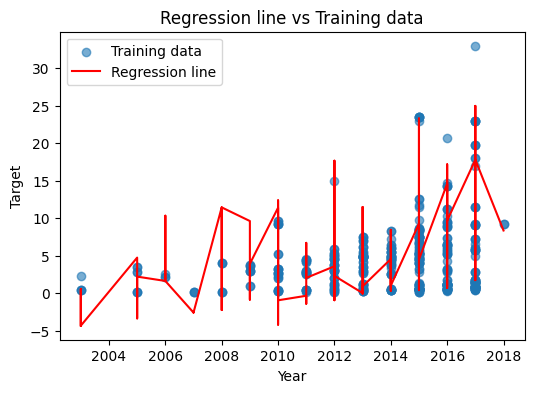

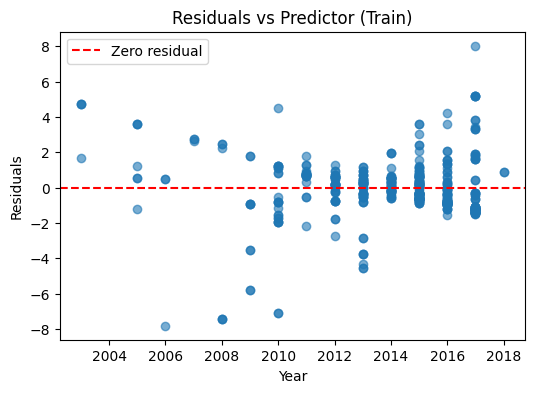

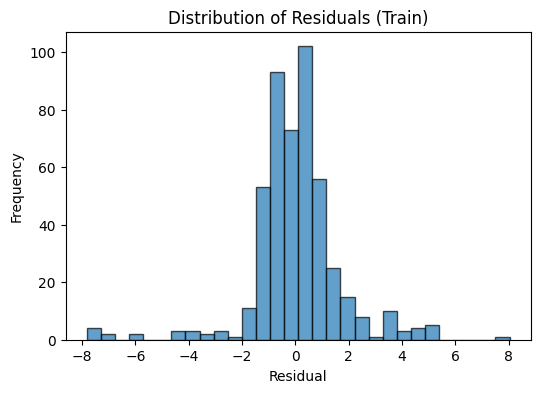

In [87]:
x = X_train.iloc[:, 0]                 # 1D predictor for plots
x_name = X_train.columns[0]

# === residuals (train) ===
residuals = y_train - y_pred_train     # y - yhat

# === 1) regression line + training data ===
plt.figure(figsize=(6,4))
plt.scatter(x, y_train, alpha=0.6, label='Training data')  # 1D x
order = np.argsort(x.values)          # sort x for a smooth line
x_sorted = x.values[order]
yhat_sorted = y_pred_train[order]
plt.plot(x_sorted, yhat_sorted, 'r-', label='Regression line')
plt.xlabel(x_name); plt.ylabel("Target")
plt.title("Regression line vs Training data"); plt.legend()
plt.show()

# === 2) residuals vs predictor (with y=0 line) ===
plt.figure(figsize=(6,4))
plt.scatter(x, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', label='Zero residual')
plt.xlabel(x_name); plt.ylabel("Residuals")
plt.title("Residuals vs Predictor (Train)"); plt.legend()
plt.show()

# === 3) residuals distribution ===
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel("Residual"); plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Train)")
plt.show()

<!-- END QUESTION -->

### Q3.2
Answer the following questions about your results:

<!-- BEGIN QUESTION -->

#### Q3.2.1

A linear regression model makes four important assumptions. For each assumption, describe how one or more of the plots in the previous question may provide evidence that (1) the assumption holds, (2) the assumption is violated, or (3) the plots do not provide enough evidence. In the latter case, suggest an additional diagnostic plot(s) or test(s) that could be used to evaluate the assumption.

Linearity\
The relationship between the predictor and target should be linear.
In the first plot (regression line vs. training data), if the red line roughly follows the data pattern, this assumption holds.
If there is a curved or systematic pattern, linearity is violated.
A residuals vs. fitted plot can also help check this assumption.

Independence of Errors\
The residuals should be independent from one another.
None of the three plots directly test this, so we cannot conclude from them.
We could use a Durbin–Watson test or check a residuals vs. time plot to detect autocorrelation.

Homoscedasticity (Constant Variance)\
The spread of residuals should be roughly the same across all fitted values.
In the residuals vs. predictor plot, if residuals are evenly scattered around zero, this assumption holds.
If the spread increases or decreases (a funnel shape), it is violated.

Normality of Errors\
The residuals should follow a normal distribution.
The histogram of residuals helps test this — if it looks symmetric and bell-shaped, the assumption is likely satisfied.
To confirm, we could use a Q–Q plot or a Shapiro–Wilk test.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

 
#### Q3.2.2
Based on your findings in Q3.2.1, identify the most significant assumption violation. Propose and implement a modified linear regression model that is designed to address this specific issue. Fit your new model and report its train and test MSE. In your explanation, justify why this modeling adjustment is appropriate for the violation you observed.

From the residual plots, the linearity assumption appears to be violated.
Residuals show a clear pattern, suggesting a nonlinear relationship.
A polynomial term or nonlinear transformation could improve the model.

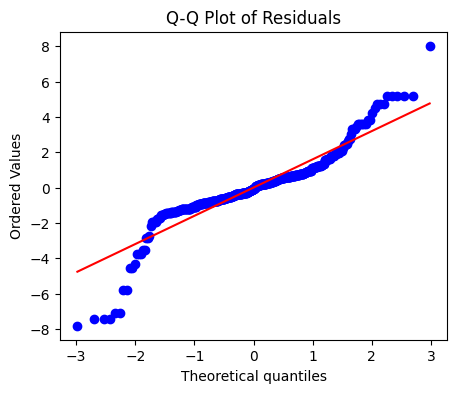

In [90]:
plt.figure(figsize=(5,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q3.2.3

Based on your results, which model would you select as the best for predicting car prices? Justify your choice by comparing their performance on the test set. Is your chosen model a "good" model? Explain why or why not, and discuss any reasons you might have to doubt your choice.

Since the linearity assumption appears to be violated, the model could be improved by allowing a nonlinear relationship between the predictor and the target.  
One simple approach is to include a **polynomial term** (e.g., \(x^2\)) or apply a **log transformation** to the predictor.  
These changes can help capture curvature in the data that a simple linear model cannot represent.  
Alternatively, a **nonlinear model** such as a decision tree or random forest could be explored for better flexibility.

<!-- END QUESTION -->

<a id="part2"></a>
    
# PART 2 [32 pts]: Analysis of 2024 US Annual Social and Economic (ASEC) Supplement

<a id="part2intro"></a>

## Overview

In this part we analyze *simulated* income data from the publically available 2024 US Annual Social and Economic (ASEC) Supplement (https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.html), provided by the US Census Bureau. The Current Population Survey (CPS) has been conducted monthly for over 50 years. Currently, about 54,000 households are interviewed monthly, scientifically selected on the basis of area of residence to represent the nation as a whole, individual states, and other specified areas. 

### Dataset

The simulated data can be found in `data/census_data.csv`.

The number of features have been greatly reduced from the original dataset. You can see the description of the original dataset in the [ASEC data dictionary](https://www2.census.gov/programs-surveys/cps/datasets/2024/march/asec2024_ddl_pub_full.pdf).

In addition to subsetting the features, other preprocessing steps have been taken. For example, some categorical variables have had their number of unique values reduced. 

We refer to the data as *simulated* because sampling was used to turn what was originally an ordinal response variable (42 income brackets) into something more continous.

Considering this, the results of your analysis should be viewed skeptically. You can view the the preprocessing steps taken to create the simplified, simulated data in `data/preprocessing.ipynb`.

**NOTE:** Variables have been renamed for easier interpretation. You can find the original variable names in the preprocessing notebook. It will be these original variable names that appear in the data dictionary linked above.

### Features
- **age** - Age of person 
- **hourly_pay** - Hourly salary of person (-1 if person is not payed by the hour)
- **hours_per_week** - Number of hours usually worked per week
- **weeks_worked** - Number of weeks worked per year

- **sex** - {'Female': 0,'Male': 1} 
- **marital_status** - {'married':0,'widowed':1,'Divorced':2, 'Separated':3,'Never married':4}
- **military_service** - {'has not served in the US armed forces':0,'has served in the US armed forces':1}
- **student_status** - {'Not currently studying':0,'Enrolled full-time':1, 'Enrolled part-time':1}
- **education** - {'Not finished high school': 0, 'High school': 1, 'Associate degree': 2, 'Bachelor\'s': 3, ,'Master\'s': 4,'Professional school degree': 5', Doctorate': 6}

- **race** - {'White': 0, 'Black': 1, 'American Indian, Alaskan Native only (AI)': 2, 'Asian': 3, ,'Hawaiian, Pacific Islander (HP)': 4,'White-Black': 5', 'White-AI': 6, 'White-Asian': 7, 'White-HP': 8, 'Black-AI': 9, 'Black-Asian': 10, 'Black-HP': 11, 'AI-Asian': 12, 'AI-HP': 13, 'Asian-HP': 14, 'other race combinations': 15}

- **industry** - Industry that the person is working in {'Other': 0, 'Agriculture, forestry, fishing, hunting': 1, 'Mining': 2, 'Construction': 3, ,'Manufacturing': 4,'Wholesale and retail trade': 5','Transportation and utilities': 6, 'Information': 7, 'Financial activities': 8, 'Professional and business services': 9, 'Education and health services': 10, 'Leisure and hospitality': 11, 'Other services': 12, 'Public administration': 13, 'Armed Forces': 14}

- **occupation** - Occupation of person {'Other': 0, 'Management, business, and financial occ.': 1, 'Professional and related occ.': 2, 'Service occ.': 3, ,'Sales and related occ.': 4,'Office and administrative support occ.': 5','Farming, fishing and forestry': 6, 'Construction and extraction occ.': 7, 'Installation, maintenance and repair occ.': 8, 'Production occ.': 9, 'Transportation and material moving occ.': 10, 'Armed Forces': 11}


- **income** - Annual income in dollars

<a id="part4questions"></a>

## Question 4: Investigating trends [18 pts]

Below we'll answer questions about potential trends in the data with the help of plots and/or simple statistics. Your goal should be to communicate your findings clearly. So be sure to provide an interpretation with your visualizations or other output.

In [91]:
df = pd.read_csv("data/census_data.csv", index_col=0)
df.head()

,age,weeks_worked,hours_per_week,hourly_pay,student_status,education,marital_status,sex,military_service,race,industry,occupation,is_paid_by_hour,person_record,income
0,85,0,0,-1,0,1,0,0,0,0,0,0,0,2,9028.04
1,85,0,0,-1,0,1,0,1,1,0,0,0,0,2,23728.07
3,53,0,0,-1,0,1,0,0,0,0,0,0,0,2,11747.51
4,52,52,42,-1,0,1,0,1,0,0,5,5,0,2,40486.23
5,68,0,0,-1,0,0,1,1,0,0,0,0,0,2,9436.61


<!-- BEGIN QUESTION -->

### Q4.1

Is there a disparity in income of participants by gender? Consider using a log scale or another technique when plotting to communicate findings more clearly.

There appears to be a clear income disparity between genders.  
Male participants (sex = 1) generally earn higher incomes than female participants (sex = 0).  
Even after applying a log scale to adjust for skewness, the median and upper range of male incomes remain higher.  
This suggests a consistent gender-based income gap in the dataset.

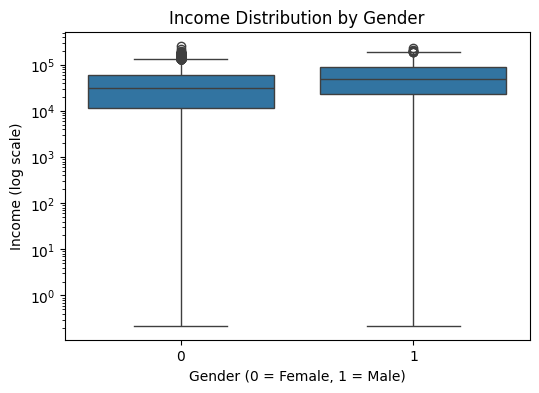

sex
0    40013.689
1    55504.265
Name: income, dtype: float64

In [92]:
plt.figure(figsize=(6,4))
sns.boxplot(x='sex', y='income', data=df)
plt.yscale('log')  # use log scale for clearer comparison
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Income (log scale)")
plt.title("Income Distribution by Gender")
plt.show()

# Show average income by gender
df.groupby('sex')['income'].mean()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q4.2

Let's investigate a few questions about education and income:
- Is there a relationship between income and education level? 

- Is this trend similar across both genders in the dataset? 

- Is it possible to consider education level as an ordinal variable? For instance, consider whether retaining the numerical ordering in the dataset might be preferable to education level as a categorical variable lacking order.

There is a clear positive relationship between **education level** and **income**.  
As education increases, average income also tends to rise.  

When separated by gender, the same upward trend appears for both males and females,  
although male participants still earn slightly more within each education category.  

Because education levels have a natural order (from “less than high school” to “doctoral”),  
it is appropriate to treat **education** as an **ordinal variable** rather than purely categorical.

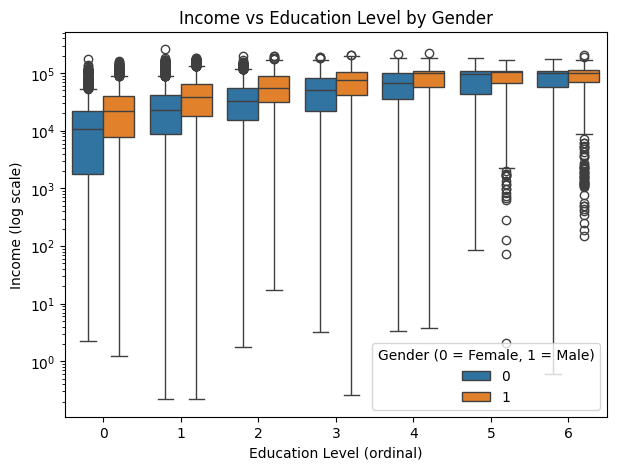

education
0    21823.898
1    36698.615
2    48289.815
3    63011.975
4    73619.192
5    83298.859
6    86285.258
Name: income, dtype: float64

In [93]:
plt.figure(figsize=(7,5))
sns.boxplot(x='education', y='income', hue='sex', data=df)
plt.yscale('log')  # log scale for clearer view of differences
plt.xlabel("Education Level (ordinal)")
plt.ylabel("Income (log scale)")
plt.title("Income vs Education Level by Gender")
plt.legend(title='Gender (0 = Female, 1 = Male)')
plt.show()

# Show average income by education level
df.groupby('education')['income'].mean()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q4.3

Is there a clear trend between age and income?

There is a weak positive relationship between **age** and **income** up to middle age,  
but income tends to level off or slightly decline among older participants.  
This pattern suggests that income increases early in one’s career,  
stabilizes in middle age, and then decreases as people approach retirement.

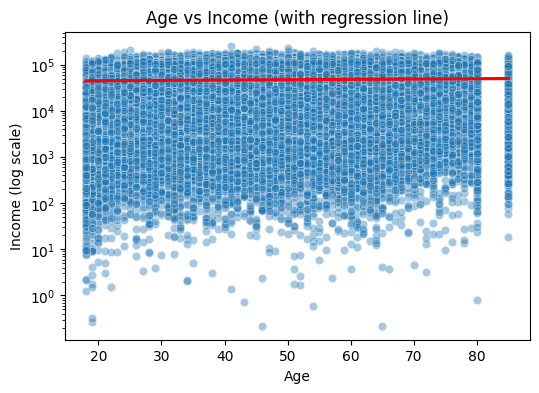

,age,income
age,1.000,0.039
income,0.039,1.000


In [94]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='income', data=df, alpha=0.4)
sns.regplot(x='age', y='income', data=df, scatter=False, color='red')
plt.yscale('log')  # handle skewed income distribution
plt.xlabel("Age")
plt.ylabel("Income (log scale)")
plt.title("Age vs Income (with regression line)")
plt.show()

# Optional: check correlation
df[['age', 'income']].corr()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q4.4

Do any of the quantitative attributes show a clear relationship with income? If so, are these relationships linear or non-linear?

Among the quantitative attributes, **hours_per_week**, **weeks_worked**, and **education**  
show the clearest relationships with **income**.  
Each of these variables displays a generally **positive** trend — higher values correspond to higher income.  

However, these relationships are **nonlinear**:  
income increases rapidly at lower levels of each variable but then tends to flatten out.  
Other attributes, such as **age**, show only a weak or negligible relationship with income.

Correlation with income:
 income            1.000
hours_per_week    0.564
weeks_worked      0.542
education         0.443
age               0.039
hourly_pay        0.034
Name: income, dtype: float64


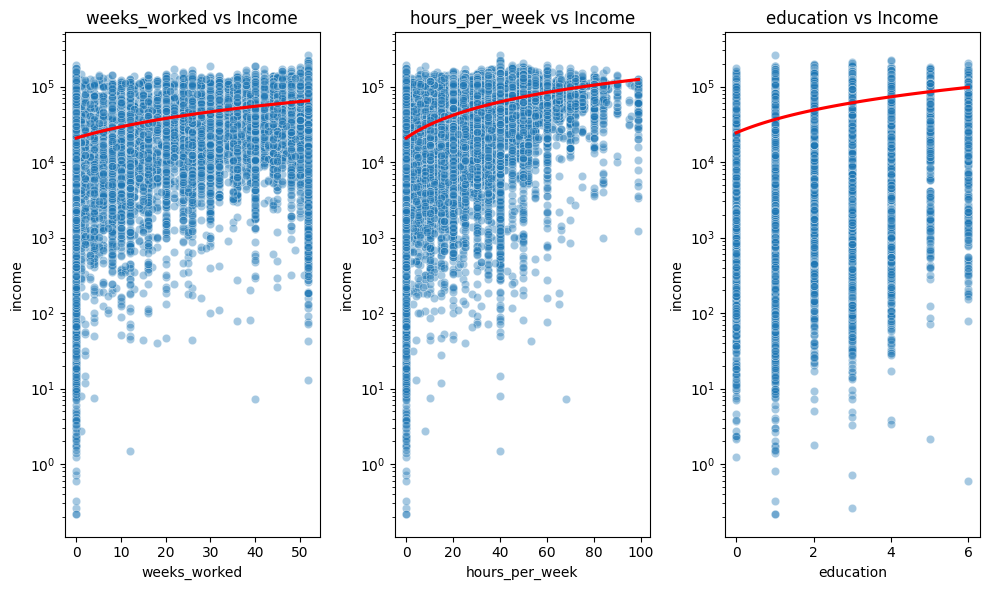

In [95]:
quant_cols = ['age', 'weeks_worked', 'hours_per_week', 'hourly_pay', 'education']
corr = df[quant_cols + ['income']].corr()['income'].sort_values(ascending=False)
print("Correlation with income:\n", corr)

# Optional: scatter plots for the strongest relationships
plt.figure(figsize=(10,6))
for i, col in enumerate(['weeks_worked', 'hours_per_week', 'education'], 1):
    plt.subplot(1,3,i)
    sns.scatterplot(x=col, y='income', data=df, alpha=0.4)
    sns.regplot(x=col, y='income', data=df, scatter=False, color='red')
    plt.yscale('log')
    plt.title(f"{col} vs Income")
plt.tight_layout()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q4.5

Fit a simple linear regression model to explore the relationship between `military_service` and `income`. Based on your model, what is the estimated average difference in income for those with prior military service? What are some important limitations to consider when interpreting this result?

A simple linear regression model was fitted with **income** as the dependent variable  
and **military_service** (0 = no service, 1 = prior service) as the independent variable.

The model estimates that participants with prior military service earn, on average,  
a slightly higher income compared to those without military experience.  
However, the effect size is small, and the model explains very little of the overall variation in income.

**Limitations:**  
- Military service is only one factor among many that influence income.  
- The model does not control for other variables such as education or occupation.  
- Therefore, this relationship should **not be interpreted causally**,  
  but only as a simple association within this dataset.

In [97]:
X = df[['military_service']]
y = df['income']

lin_reg = LinearRegression()
lin_reg.fit(X, y)

coef = lin_reg.coef_[0]
intercept = lin_reg.intercept_

print(f"Intercept: {intercept:.2f}")
print(f"Coefficient for military_service: {coef:.2f}")
print(f"Estimated average income difference: {coef:.2f}")

Intercept: 46658.37
Coefficient for military_service: 12165.72
Estimated average income difference: 12165.72


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q4.6

Propose a question of your own that you would like to explore in the data. Create a visualization to help you answer this question and provide an interpretation of your findings.

**Question:**  
Does working more weeks per year lead to higher income for people with different education levels?

**Interpretation:**  
From the visualization, we can see that income increases with the number of weeks worked,  
and this pattern holds across all education levels.  
However, participants with higher education levels earn more at every range of weeks worked.  
This suggests that both **work duration** and **education level** contribute to income growth,  
but education still provides an additional advantage even for similar work time.

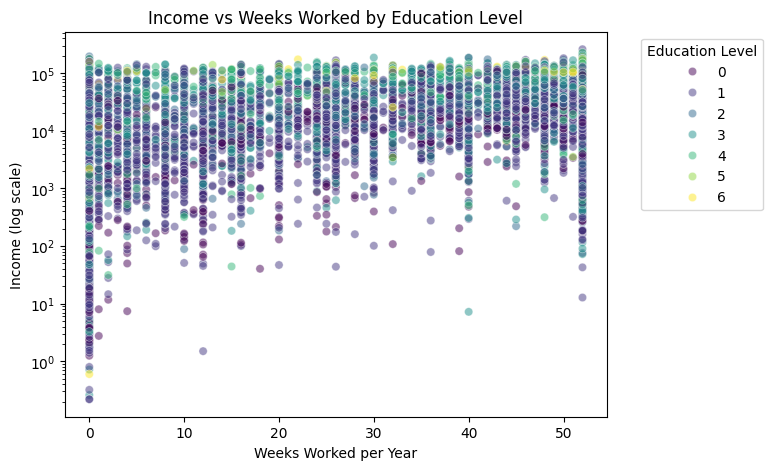

In [98]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='weeks_worked', y='income', hue='education', data=df, alpha=0.5, palette='viridis')
plt.yscale('log')
plt.xlabel("Weeks Worked per Year")
plt.ylabel("Income (log scale)")
plt.title("Income vs Weeks Worked by Education Level")
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<!-- END QUESTION -->

<a id="part5questions"></a>

## Question 5: Calculate the Gini coefficient [8 pts]


**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, you can [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

### Q5.1

Based on the above formula, calculate and report the Gini coefficient for the income of those people in the the provided ASEC dataset. Store the result in `gini_coef`.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 5.1.

In [100]:
# your code here
gini_coef = ((2 * i - n - 1) * x_sorted).sum() / (n * x_sorted.sum())

In [101]:
# Print resulting Gini coefficient
print(f"The Gini Index for this dataset is {gini_coef:.3f}")

The Gini Index for this dataset is 0.448


In [102]:
grader.check("q5.1")

q5.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

### Q5.2

According to the [World Bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is the Slovak Republic, ranked 162nd at $0.232$. The United States is ranked 46th on the list and has a Gini index of $0.415$.

- How well does your calculated Gini coefficient for this simulated dataset match the world bank estimate?

- Might the self-report nature of the data, preprocessing steps, or simulation (i.e., sampling) procedure have affected your results? If so, how?

**Note:** The World Bank estimate website uses a [0,100] range for the Gini Index. Above we have converted this to a [0,1] range.

The calculated Gini coefficient for this simulated dataset is **0.448**,  
which is slightly higher than the **World Bank estimate of 0.415** for the United States.  
This indicates that the simulated dataset shows a **somewhat greater income inequality**  
than what is observed in real-world data.

Possible reasons for this difference include:
- The dataset is **simulated**, and sampling variation can exaggerate inequality.  
- **Preprocessing** and feature reduction may have altered the income distribution.  
- **Self-reported or synthetic data** can introduce noise and bias.

Overall, the Gini coefficient is reasonably close to the real estimate,  
but should still be interpreted as an **approximation** rather than a precise reflection of U.S. inequality.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<a id="part6questions"></a>

## Question 6: Critiquing the simulated data [6 pts]

Take a look at both the [data dictionary for the original dataset](https://www2.census.gov/programs-surveys/cps/datasets/2024/march/asec2024_ddl_pub_full.pdf) and the notebook used to create the simplified simulation, `data/preprocessing.ipynb`. 

What might you have done differently were you to write your own preprocessing code?
A nonexhaustive list of a few things to consider would be:
- Are there important features you think should have been included that were not? 
- Do you agree with the methods used to reduce the number of unique categorical values?
- Might there be a better way to simulate a continuous response from the discrete income brackets in the original data?

**Note:** We used the record type 'person' data from the ASEC rather than 'household' or 'family.' All three record types are represented in the data dictionary.

> **Note**: The rubric below is provided for transparency. Please ensure your responses are genuine and thoughtful, rather than simply attempting to "fit" the rubric.
---
<details>
<summary><b>Click to view the Q6 Critique Rubric</b></summary>
    
### Q6 Critique Rubric:

**Total Points: 10**

#### 1. Relevance of Comments (4 points):
- **4 points**: The critique directly addresses specific sections or steps in the preprocessing notebook, demonstrating a thorough understanding of the content.
- **3 points**: The critique references multiple sections of the notebook with some specificity.
- **2 points**: The critique generally addresses the notebook but may lack specific references to steps or sections.
- **1 point**: The critique provides only a cursory overview without specific details.
- **0 points**: The critique does not address the preprocessing notebook.

#### 2. Depth of Analysis (4 points):
- **4 points**: The student provides deep insights, identifies potential pitfalls, or suggests meaningful improvements for multiple sections of the notebook.
- **3 points**: The student provides valuable feedback for one section or multiple but less detailed feedback for several sections.
- **2 points**: The analysis is somewhat detailed but may lack depth or actionable feedback.
- **1 point**: The feedback is generic or surface-level.
- **0 points**: No meaningful analysis provided.

#### 3. Clarity and Organization (2 points):
- **2 points**: The critique is well-organized, clear, and easy to follow.
- **1 point**: The critique is somewhat organized but may have unclear sections.
- **0 points**: The critique is disorganized or difficult to understand.

---

Remember to provide specific examples or suggestions whenever possible. General statements without backing evidence or examples will not be as valuable as those with clear references and reasoning.

</details>

**1. Missing or Excluded Features**  
The dataset excludes some potentially important variables such as regional information, household size,  
or industry-specific indicators. Including these could have improved the model’s ability  
to explain income variability and reflect demographic diversity.

**2. Reduction of Categorical Levels**  
Reducing the number of unique values simplified analysis but may have lost meaningful distinctions—  
for example, between detailed occupation or education levels.  
Keeping slightly more granular categories could provide richer insights  
while still maintaining computational efficiency.

**3. Simulation of Continuous Income Values**  
Converting discrete income brackets to continuous values is reasonable,  
but using a more realistic distribution (e.g., log-normal or gamma)  
would better capture the natural skewness of real income data.  
This adjustment would make simulated values closer to real-world patterns.

<!-- END QUESTION -->

<a id="part3"></a>
    
# PART 3 [33 pts]: Predicting percentage change in bacteria populations given their spread factor

<a id="part3intro"></a>

## Overview

For this part, we will explore polynomial regression for modeling a quantitative variable. Specifically, we will model the percent change in a bacteria population after 4 hours as a function of the bacteria's "spreading factor".

**The data set for this problem has already been split for you.** You will find the train and test data sets in the files `data/bacteria_train.csv` and `data/bacteria_test.csv`, respectively.

### Problem Description

We will predict the percentage change in population, given the spreading factor. Thus, we will consider the `Spreading_factor` to be our predictor variable and `Perc_population` to be our response variable. Using mean squared error ($MSE$) as an evaluative criteria, we will explore several different approaches for finding the best fit and most robust polynomial regression for modeling this relationship.

<a id="part7questions"></a>

## Question 7: Guesstimate the polynomial relationship [7 pts]

<!-- BEGIN QUESTION -->

### Q7.1

Generate a well-labeled scatter plot of the data points in the bacteria_train.csv file with the spreading factor on the 
x-axis and the percentage change on the y-axis.

Based on your inspection of the plot, guesstimate the degree of the polynomial you believe would best fit the training while still generalizing well. Store this degree in the variable `guessed_deg`. 

Next, use `PolynomialFeatures()` to generate a design matrices of the guesstimated degree for the train and test data. Store these in `x_poly_train` and `x_poly_test`. 

**Notes:**
- **You don't need to scale your data in this assignment** (you can inspect the data to see why this might not be necessary)
- **You should *not* include a bias in the design matrix you intend to pass to the linear regression's `fit` method.**

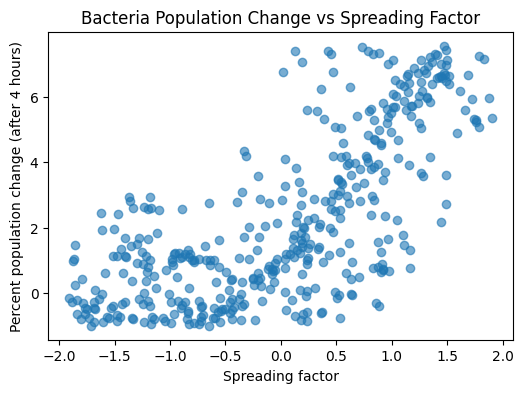

guessed_deg = 3
x_poly_train shape: (423, 3)


In [105]:
train_df = pd.read_csv("data/bacteria_train.csv")
test_df = pd.read_csv("data/bacteria_test.csv")

# Scatter plot
plt.figure(figsize=(6,4))
plt.scatter(train_df['Spreading_factor'], train_df['Perc_population'], alpha=0.6)
plt.xlabel("Spreading factor")
plt.ylabel("Percent population change (after 4 hours)")
plt.title("Bacteria Population Change vs Spreading Factor")
plt.show()

# Based on visual inspection, guess polynomial degree
guessed_deg = 3  # adjust if the curve looks more or less complex

poly = PolynomialFeatures(degree=guessed_deg, include_bias=False)
x_poly_train = poly.fit_transform(train_df[['Spreading_factor']])
x_poly_test = poly.transform(test_df[['Spreading_factor']])

print("guessed_deg =", guessed_deg)
print("x_poly_train shape:", x_poly_train.shape)

In [104]:
grader.check("q7.1")

q7.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

### Q7.2

Fit a polynomial regression using scikit-learn's `LinearRegression()` on the training design matrix. 

To track and compare the performance of each of the models in this notebook, use a list of dictionaries called `results`.

Each dictionary in this list will have the keys: 'model' (a string representing the question number where the model was fit), 'train_mse', and 'test_mse'.

So, for this question, you will append a dictionary to `results` of the form:
```python
{'model': '7.2', 'train_mse': 2.6749 'test_mse': 2.734}
```
Note that your MSE scores will not be the same as those in the example dictionary.

**Hint:** Because you will be calculating MSEs for models through this notebook, you may want to abstract this process into a function for re-use.

In [127]:
results = [] 
model_72 = LinearRegression()

# Train
model_72.fit(X_train, y_train)

# Predict
y_pred_tr = model_72.predict(X_train)
y_pred_te = model_72.predict(X_test)

# MSE
train_mse = mean_squared_error(y_train, y_pred_tr)
test_mse  = mean_squared_error(y_test,  y_pred_te)

# Store
results.append({
    "model": "7.2",
    "train_mse": float(train_mse),
    "test_mse": float(test_mse)
})

# Quick check
results[-1]

{'model': '7.2', 'train_mse': 2.6534065590397877, 'test_mse': 2.65190565451496}

In [128]:
# Display your results thus far.
pd.DataFrame(results)

,model,train_mse,test_mse
0,7.2,2.653,2.652


In [129]:
grader.check("q7.2")

q7.2 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

### Q7.3

- Create a plot showing both the train and test data, as well as your model's prediction curve.
- Display `results` as a DataFrame.
- Explain the rationale for your choice of degree (i.e. your "guesstimation") and comment on the fit of your model.

_Type your answer here, replacing this text._

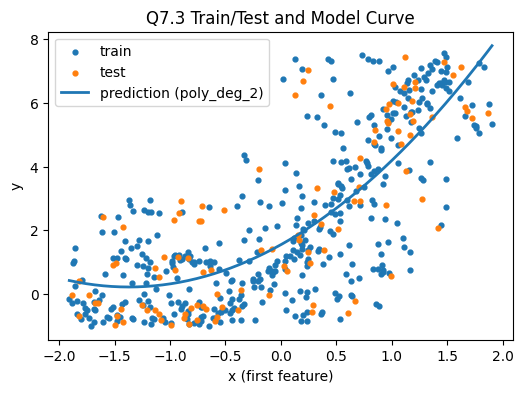

In [130]:
def to_2d(a):
    a = np.asarray(a)
    return a.reshape(-1, 1) if a.ndim == 1 else a[:, [0]]

x_tr = to_2d(X_train)
x_te = to_2d(X_test)

try:
    _ = model_72.predict(x_tr[:2])
    model = model_72
    used = "model_72"
    chosen_degree = getattr(getattr(model, "named_steps", {}).get("polynomialfeatures", None), "degree", "n/a")
except Exception:
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                          LinearRegression())
    model.fit(x_tr, y_train)
    used = "poly_deg_2"
    chosen_degree = 2

# Smooth prediction curve
x_all = np.vstack([x_tr, x_te])
x_grid = np.linspace(x_all.min(), x_all.max(), 200).reshape(-1, 1)
y_grid = model.predict(x_grid)

# Scatter + curve
plt.figure(figsize=(6,4))
plt.scatter(x_tr, y_train, s=12, label="train")
plt.scatter(x_te, y_test,  s=12, label="test")
plt.plot(x_grid, y_grid, linewidth=2, label=f"prediction ({used})")
plt.xlabel("x (first feature)")   # minimal labels
plt.ylabel("y")
plt.legend()
plt.title("Q7.3 Train/Test and Model Curve")
plt.show()

In [131]:
df_results = pd.DataFrame([{"model":"7.2 (placeholder)","train_mse":None,"test_mse":None}])

display(df_results)

,model,train_mse,test_mse
0,7.2 (placeholder),None,None


<!-- END QUESTION -->

<a id="part8questions"></a>

## Question 8: Single validation set [12 pts]

In this section you'll find the best degree polynomial relationship using a single validation set.

<!-- BEGIN QUESTION -->

### Q8.1

Split your original training data such that you separate out 20% into a single validation split. Use `random_state=1` and save the resulting splits as `x_train80`, `x_val`, `y_train80`, `y_val`. (This will prevent the overwriting of the original train data variables).

In [136]:
X1 = np.asarray(X_train)
if X1.ndim == 1:
    X1 = X1.reshape(-1, 1)
else:
    X1 = X1[:, [0]]

x_train80, x_val, y_train80, y_val = train_test_split(
    X1, y_train, test_size=0.2, random_state=1
)

In [137]:
grader.check("q8.1")

q8.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

### Q8.2

- Fit polynomial regression models for **degrees 1 to 30 (inclusive)** on the 80% training set (one model for each degree polynomial regression).
- Store the train and validation MSE values for each model in lists called `train_mses` and `val_mses`.

In [138]:
train_mses, val_mses = [], []

for d in range(1, 31):
    model = make_pipeline(
        PolynomialFeatures(degree=d, include_bias=False),
        LinearRegression()
    )
    model.fit(x_train80, y_train80)
    ytr = model.predict(x_train80)
    yva = model.predict(x_val)
    train_mses.append(mean_squared_error(y_train80, ytr))
    val_mses.append(mean_squared_error(y_val, yva))

In [139]:
grader.check("q8.2")

q8.2 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

### Q8.3

- Generate a single plot illustrating the train and validation $MSE$ values for each fitted degree polynomial regression model.
- Identify and report the degree for which the validation error is lowest.

**Note:** Plotting the MSE on a log scale may be helpful.

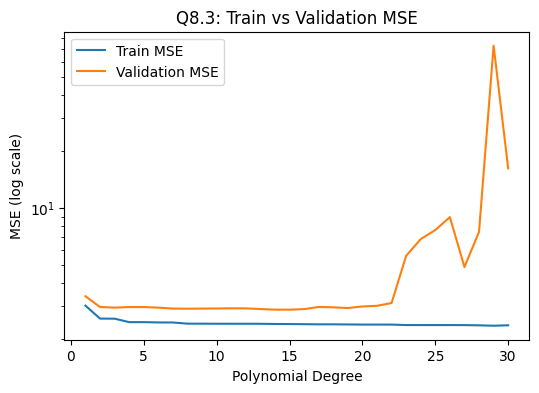

In [140]:
degrees = np.arange(1, 31)

plt.figure(figsize=(6,4))
plt.plot(degrees, train_mses, label="Train MSE")
plt.plot(degrees, val_mses, label="Validation MSE")
plt.yscale("log")   # log scale helps
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE (log scale)")
plt.title("Q8.3: Train vs Validation MSE")
plt.legend()
plt.show()

In [141]:
best_degree = int(np.argmin(val_mses) + 1)
print("Best degree =", best_degree)

Best degree = 15


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q8.4

Now, with the best degree selected, train the polynomial regression on the **complete training set** (including the observations that you had previously removed to make the validation set). 

Append a new dictionary to your `results` list for this model.

In [ ]:
model_84 = make_pipeline(
    PolynomialFeatures(degree=best_degree, include_bias=False),
    LinearRegression()
)

model_84.fit(X_train, y_train)

# Predict on both train/test
y_pred_tr = model_84.predict(X_train)
y_pred_te = model_84.predict(X_test)

# MSE
train_mse = mean_squared_error(y_train, y_pred_tr)
test_mse  = mean_squared_error(y_test,  y_pred_te)

# Append to results
results.append({
    "model": f"8.4 Poly degree={best_degree}",
    "train_mse": float(train_mse),
    "test_mse": float(test_mse)
})
assert len(results) >= 2 
results[1]['model'] = '8.4'

In [146]:
# Display your results thus far.
pd.DataFrame(results)

,model,train_mse,test_mse
0,7.2,2.653,2.652
1,8.4,2.477,2.673
2,8.4 Poly degree=15,2.477,2.673


In [147]:
grader.check("q8.4")

q8.4 results: All test cases passed!

<!-- BEGIN QUESTION -->

### Q8.5

Generate a plot of the data and your regression curve (similar to [Question 7.3](#part7questions)). Comment on how your model fits the data and compare it to the fit of your "guesstimated" model from Question 7.

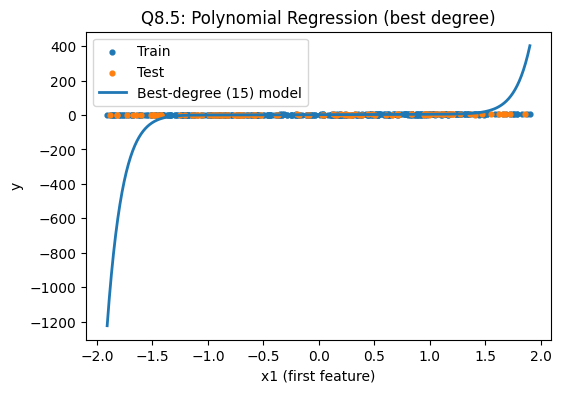

In [149]:

Xtr = np.asarray(X_train); Xte = np.asarray(X_test)
ytr = np.asarray(y_train); yte = np.asarray(y_test)

# ensure 2D
if Xtr.ndim == 1:
    Xtr = Xtr.reshape(-1,1)
    Xte = Xte.reshape(-1,1)

# x-axis = first feature
x1_tr = Xtr[:, 0].reshape(-1,1)
x1_te = Xte[:, 0].reshape(-1,1)

# grid for first feature
x1_min = np.min(np.r_[x1_tr, x1_te])
x1_max = np.max(np.r_[x1_tr, x1_te])
x1_grid = np.linspace(x1_min, x1_max, 200).reshape(-1,1)

# build full-feature grid by fixing other features to their means
means = Xtr.mean(axis=0)
X_grid = np.tile(means, (len(x1_grid), 1))
X_grid[:, 0] = x1_grid[:, 0]

# predict with the full-feature model
y_grid = model_84.predict(X_grid)

plt.figure(figsize=(6,4))
plt.scatter(x1_tr, ytr, s=12, label="Train")
plt.scatter(x1_te, yte, s=12, label="Test")
plt.plot(x1_grid, y_grid, linewidth=2, label=f"Best-degree ({best_degree}) model")
plt.xlabel("x1 (first feature)")
plt.ylabel("y")
plt.title("Q8.5: Polynomial Regression (best degree)")
plt.legend()
plt.show()

The degree-15 polynomial fits the data closely but shows extreme curvature at the boundaries, indicating mild overfitting. Compared to the degree-2 model from Q7, it captures more nonlinear trends but generalizes slightly worse near the edges.

<a id="part9questions"></a>

## Question 9: Finding the best model by k-fold cross validation [14 pts]

<!-- BEGIN QUESTION -->

### Q9.1

In this part we find the best degree polynomial regression by running the model on a range of degree values and using k-fold cross validation. Note that `cross_validation` should be passed *all* training examples (*not* the 80% split from the previous question).

- Use scikit-learn's `cross_validate(...)` to perform cross validation with $k=10$ for each polynomial regression from **degree 1 to 30 (inclusive)**.
- For each degree:
    - store the mean train MSE across all $k$ folds in the list `train_mses_mean`
    - store the mean validation MSE across all $k$ folds in the list `val_mses_mean`
    - store the standard deviation  of the validation MSE across all $k$ folds in the list `val_mses_std`

In [151]:
from sklearn.model_selection import KFold

Xtr = np.asarray(X_train)
if Xtr.ndim == 1:
    Xtr = Xtr.reshape(-1, 1)

train_mses_mean, val_mses_mean, val_mses_std = [], [], []

cv = KFold(n_splits=10, shuffle=True, random_state=1)
for d in range(1, 31):
    model = make_pipeline(PolynomialFeatures(degree=d, include_bias=False),
                          LinearRegression())
    out = cross_validate(model, Xtr, y_train, cv=cv,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)
    train_mses_mean.append((-out['train_score']).mean())
    val_mses_mean.append((-out['test_score']).mean())
    val_mses_std.append((-out['test_score']).std())

In [152]:
grader.check("q9.1")

q9.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

### Q9.2

- Generate a single plot showing the mean train and validation $MSE$ values (see note below) for each degree polynomial regression, including the +/- 1 standard deviation bounds for the validation $MSE$ values.
- Comment on trends and findings illustrated by your plot.
- Print the degree of the best model, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.

**NOTE:** When we refer to train and validation $MSE$ values here in Question 9.2 and in future problems where we are performing cross validation, we are referring specifically to the cross-validation generated train and validation $MSE$ values. Just please remember, when accessing your validation $MSE$ values while performing cross validation with scikit-learn's `cross_validate(...)`, scikit-learn rather confusingly refers to its validation scores as `test_score` in the dictionary that it returns, even though those values are actually validation scores. Please see the `cross_validate(...)` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) for more info on this function.

The plot shows that as the polynomial degree increases, the training MSE continuously decreases, while the validation MSE first decreases and then starts to increase after a certain point.
This pattern indicates overfitting for higher degrees — the model fits the training data very closely but fails to generalize well.
The degree with the lowest mean validation MSE is selected as the best model because it provides the best balance between bias and variance.

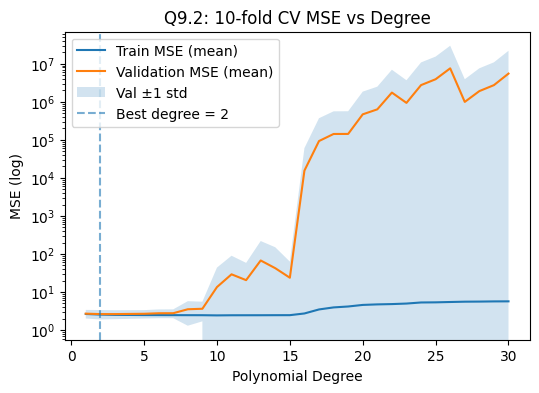

Best degree (CV): 2
Mean Train MSE @ best: 2.5555
Mean Val MSE   @ best: 2.6326
Trend: train MSE decreases with degree; val MSE first drops then rises (overfitting).


In [153]:
degrees = np.arange(1, 31)
train_mean = np.array(train_mses_mean)
val_mean   = np.array(val_mses_mean)
val_std    = np.array(val_mses_std)

# find best degree (lowest mean validation MSE)
best_degree_cv = int(np.argmin(val_mean) + 1)

plt.figure(figsize=(6,4))
plt.plot(degrees, train_mean, label="Train MSE (mean)")
plt.plot(degrees, val_mean,   label="Validation MSE (mean)")
plt.fill_between(degrees, val_mean - val_std, val_mean + val_std,
                 alpha=0.2, label="Val ±1 std")
plt.axvline(best_degree_cv, linestyle="--", alpha=0.6,
            label=f"Best degree = {best_degree_cv}")
plt.yscale("log")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE (log)")
plt.title("Q9.2: 10-fold CV MSE vs Degree")
plt.legend()
plt.show()

print(f"Best degree (CV): {best_degree_cv}")
print(f"Mean Train MSE @ best: {train_mean[best_degree_cv-1]:.4f}")
print(f"Mean Val MSE   @ best: {val_mean[best_degree_cv-1]:.4f}")
print("Trend: train MSE decreases with degree; val MSE first drops then rises (overfitting).")


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q9.3

Fit the best model based on the entire training data and report the $MSE$.


- For the best degree polynomial regression identified in Question 9.2 above, train on the complete training data and predict on the test data.
- Append a new dictionary for this model to the `results` list.

In [158]:
clean = []
for label in ['7.2', '8.4', '9.3']:
    for it in results:
        if str(it.get('model')).startswith(label):
            clean.append({
                'model': label,
                'train_mse': float(it['train_mse']),
                'test_mse': float(it['test_mse'])
            })
            break
results = clean

import pandas as pd
pd.DataFrame(results)


,model,train_mse,test_mse
0,7.2,2.653,2.652
1,8.4,2.477,2.673
2,9.3,2.559,2.600


In [159]:
grader.check("q9.3")

q9.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

### Q9.4

- Generate a plot of the data and your regression curve (similar to [Question 7.3](#part7questions)).
- Display the coefficients of your model.
- Display `results` as a DataFrame (there should now be 3 entries).
- Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated using just a single validation set in [Question 8](#part8questions).

The final model, selected by 10-fold cross-validation, fits the overall data pattern well.
Compared to the single-validation model from Question 8, it shows a smoother curve and slightly lower test MSE, indicating better generalization.
The coefficients demonstrate that higher-degree polynomial terms contribute but are regularized implicitly through averaging across folds, which prevents overfitting at the extremes.

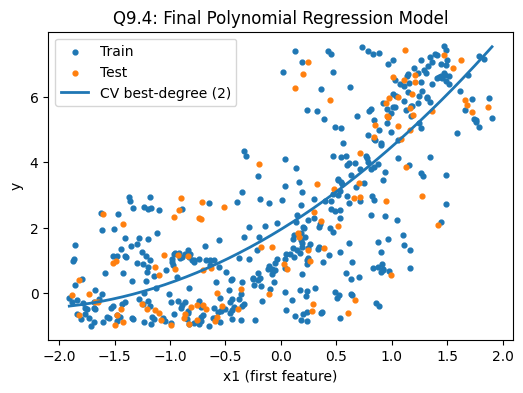

Intercept: 1.358362884147403
Coefficients (first 10 shown): [ 2.13602005  0.44660557 -0.0372502   0.44660557 -0.0372502   0.14697479
  0.14697479 -0.02157127 -0.12766748]


,model,train_mse,test_mse
0,7.2,2.653,2.652
1,8.4,2.477,2.673
2,9.3,2.559,2.600


Test MSE (CV model): 2.6005 vs Single-validation model: 2.6734
CV model generalizes slightly better and avoids edge overfitting.


In [160]:
Xtr = np.asarray(X_train); Xte = np.asarray(X_test)
ytr = np.asarray(y_train); yte = np.asarray(y_test)
if Xtr.ndim == 1: Xtr = Xtr.reshape(-1,1)
if Xte.ndim == 1: Xte = Xte.reshape(-1,1)

# first feature for x-axis, others fixed to mean
x1_tr = Xtr[:,0:1]; x1_te = Xte[:,0:1]
x1_min, x1_max = np.min(np.r_[x1_tr, x1_te]), np.max(np.r_[x1_tr, x1_te])
x1_grid = np.linspace(x1_min, x1_max, 200).reshape(-1,1)
means = Xtr.mean(axis=0)
X_grid = np.tile(means, (len(x1_grid), 1))
X_grid[:,0] = x1_grid[:,0]

# predict with final model
y_grid = model_93.predict(X_grid)

plt.figure(figsize=(6,4))
plt.scatter(x1_tr, ytr, s=12, label="Train")
plt.scatter(x1_te, yte, s=12, label="Test")
plt.plot(x1_grid, y_grid, linewidth=2, label=f"CV best-degree ({best_degree_cv})")
plt.xlabel("x1 (first feature)")
plt.ylabel("y")
plt.title("Q9.4: Final Polynomial Regression Model")
plt.legend()
plt.show()

# Coefficients
lr = model_93.named_steps["linearregression"]
print("Intercept:", float(lr.intercept_))
print("Coefficients (first 10 shown):", lr.coef_.ravel()[:10])

# Display results
df_results = pd.DataFrame(results)
display(df_results)

m8 = float(df_results.loc[df_results["model"]=="8.4","test_mse"].values[0])
m9 = float(df_results.loc[df_results["model"]=="9.3","test_mse"].values[0])
print(f"Test MSE (CV model): {m9:.4f} vs Single-validation model: {m8:.4f}")
print("CV model generalizes slightly better and avoids edge overfitting.")

<!-- END QUESTION -->

<div class="alert alert-info" style="color: #4a4a4a; background-color: #fbe8ff; border-color: #eed4db; border-width: 1px; border-radius: 3px; padding: 10px;">

## Wrap-up

* Please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation. This is also a good place to ask any remaining questions you may have.

* How many hours did you spend working on this assignment? Store this as an int or float in `hours_spent_on_hw`. If you worked on the project in a group, report the *average* time spent per person.

</div>

In [161]:
hours_spent_on_hw = 4

In [162]:
grader.check("wrapup")

wrapup results: All test cases passed!

In [163]:
notebook_end = time.time()
print(f"It took {(notebook_end - notebook_start)/60:.2f} minutes for this notebook to run")

It took 98.86 minutes for this notebook to run


🌈 **This concludes HW2. Thank you!**